In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('NC_policing.csv')

print(df.dtypes)
print(df.isna().sum())  # check for missing values

state                  object
stop_date              object
driver_gender          object
driver_age            float64
driver_race_raw        object
driver_race            object
violation              object
search_type            object
contraband_found         bool
stop_outcome           object
search_basis           object
officer_id              int64
drugs_related_stop     object
district               object
dtype: object
state                      0
stop_date                  0
driver_gender              0
driver_age                91
driver_race_raw            0
driver_race                0
violation                  0
search_type                0
contraband_found           0
stop_outcome               0
search_basis               0
officer_id                 0
drugs_related_stop    397708
district                  38
dtype: int64


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402087 entries, 0 to 402086
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   state               402087 non-null  object 
 1   stop_date           402087 non-null  object 
 2   driver_gender       402087 non-null  object 
 3   driver_age          401996 non-null  float64
 4   driver_race_raw     402087 non-null  object 
 5   driver_race         402087 non-null  object 
 6   violation           402087 non-null  object 
 7   search_type         402087 non-null  object 
 8   contraband_found    402087 non-null  bool   
 9   stop_outcome        402087 non-null  object 
 10  search_basis        402087 non-null  object 
 11  officer_id          402087 non-null  int64  
 12  drugs_related_stop  4379 non-null    object 
 13  district            402049 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(11)
memory usage: 40.3+ MB


In [4]:
df.describe()

,driver_age,officer_id
count,401996.000000,4.020870e+05
mean,41.878103,9.815943e+04
std,13.019045,1.013238e+07
min,15.000000,0.000000e+00
25%,32.000000,1.098700e+04
50%,42.000000,1.166500e+04
75%,52.000000,2.110500e+04
max,99.000000,2.155422e+09


In [5]:
df.head()

,state,stop_date,driver_gender,driver_age,driver_race_raw,driver_race,violation,search_type,contraband_found,stop_outcome,search_basis,officer_id,drugs_related_stop,district
0,NC,2000-07-31,M,23.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
1,NC,2000-07-31,F,29.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
2,NC,2000-07-31,F,49.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
3,NC,2000-07-31,M,29.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
4,NC,2000-07-31,M,24.0,U H,Hispanic,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3


In [9]:
print(df['officer_id'])

0         10606
1         10606
2         10606
3         10606
4         10606
          ...  
402082    21715
402083    10592
402084    21848
402085    11887
402086    21553
Name: officer_id, Length: 402087, dtype: int64


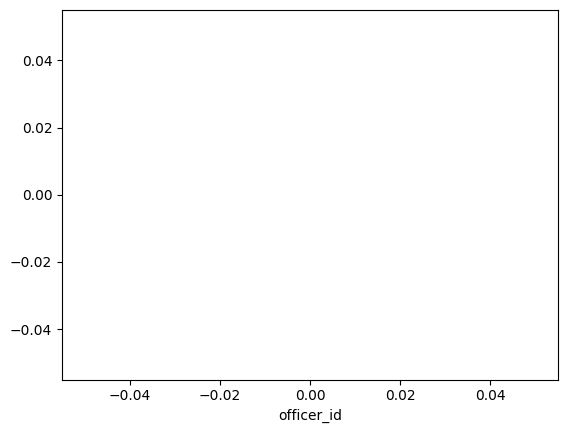

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns


    
sns.scatterplot(data=df, x='officer_id')


plt.show()

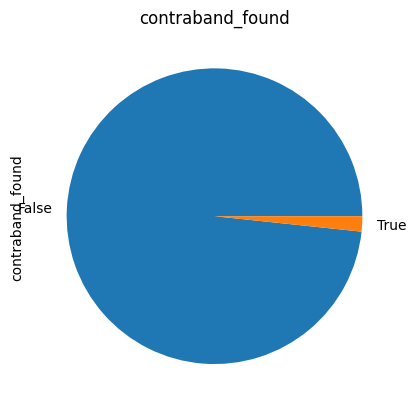

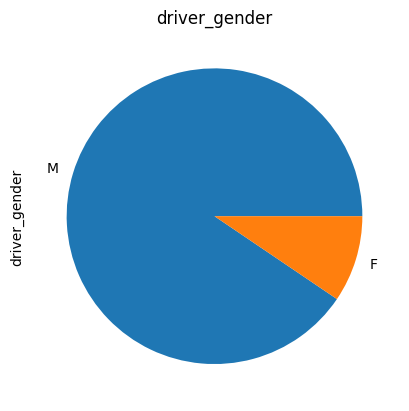

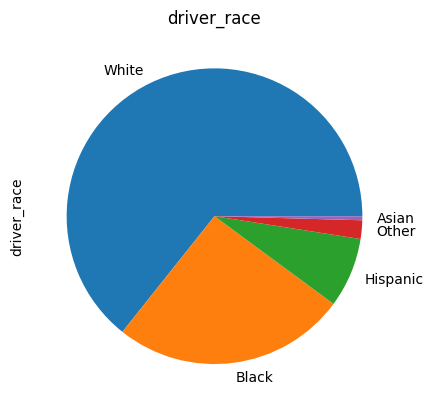

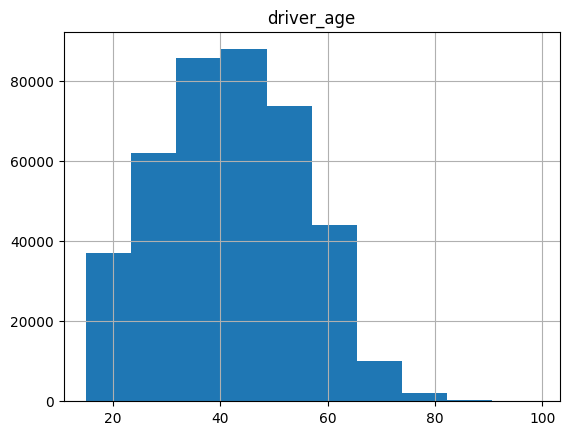

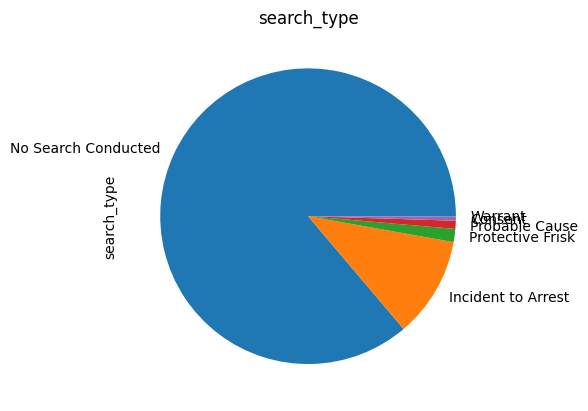

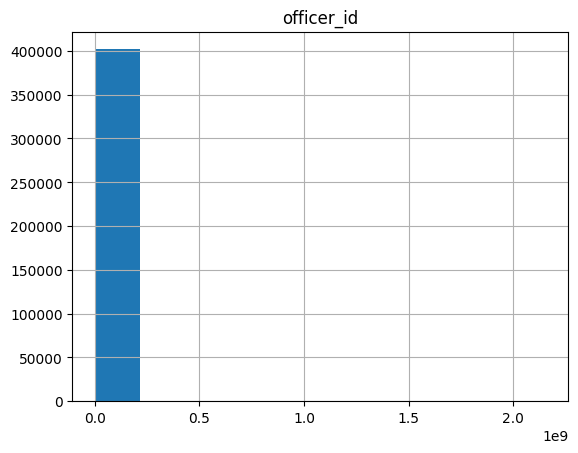

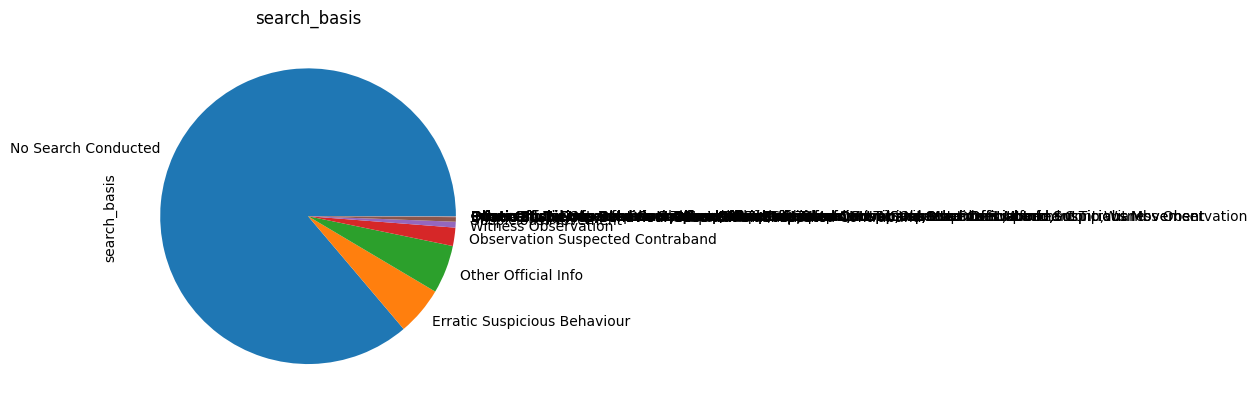

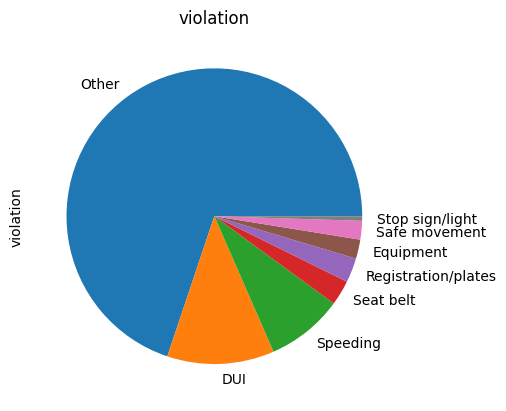

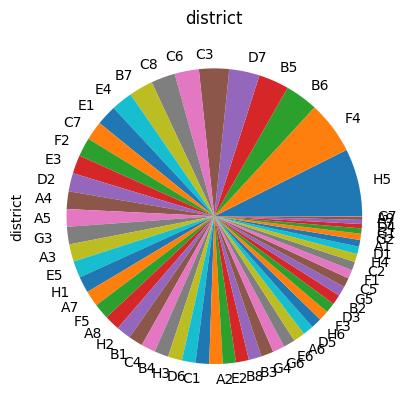

In [12]:
import matplotlib.pyplot as plt

# Separate visualization for boolean columns
boolean_columns = ['contraband_found']  # Add other boolean columns if any

for column in boolean_columns:
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()

# For the rest of the columns
remaining_columns = set(df.columns) - set(boolean_columns)
for column in remaining_columns:
    if df[column].dtype == 'object':
        df[column].value_counts().plot(kind='pie')
    else:
        df[column].hist()
    plt.title(column)
    plt.show()


In [ ]:
columns_to_drop = ['state','stop_date', 'drugs_related_stop', 'driver_race_raw','stop_outcome']

df.drop(columns=columns_to_drop, inplace=True)


print(df.head())

In [ ]:
'''
# Handling Missing Values

df['driver_age'].fillna(df['driver_age'].median(), inplace=True)
#df['drugs_related_stop'].fillna('No', inplace=True)
df['district'].fillna(df['district'].mode()[0], inplace=True)

# Handling Outliers
df_encoded = pd.get_dummies(df, columns=['driver_gender', 'driver_race', 'violation', 'search_type', 'district'], drop_first=True)

# Scaling Numerical Variables
scaler = StandardScaler()
df[['driver_age', 'officer_id']] = scaler.fit_transform(df[['driver_age', 'officer_id']])
'''

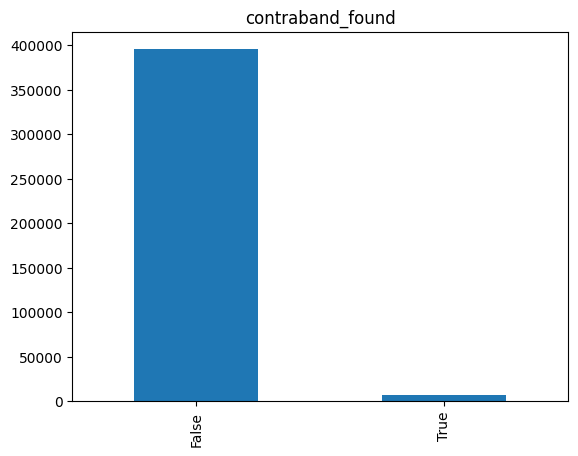

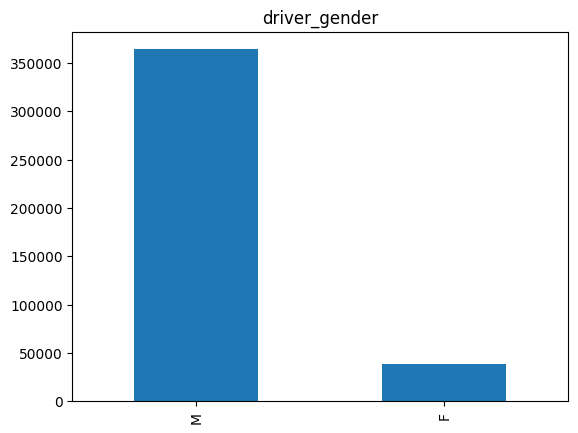

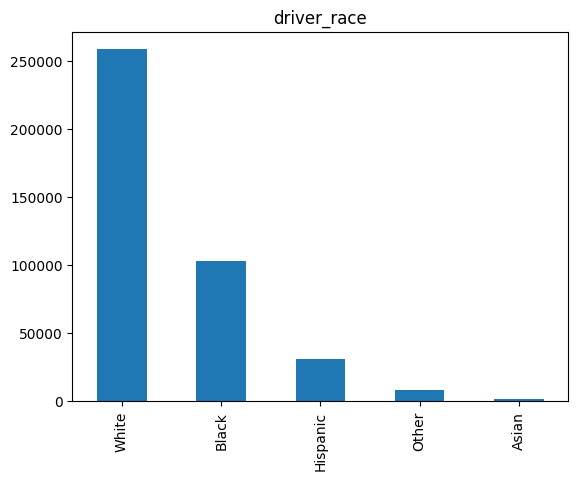

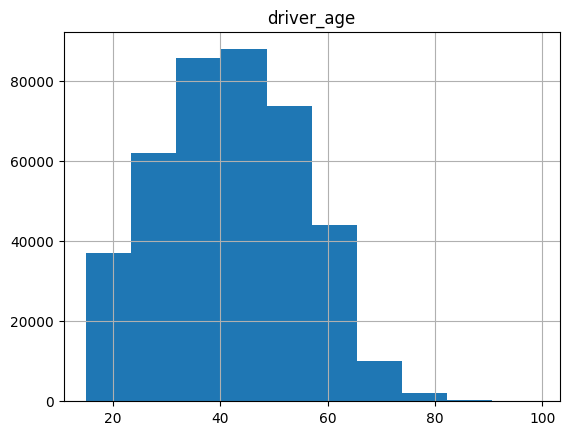

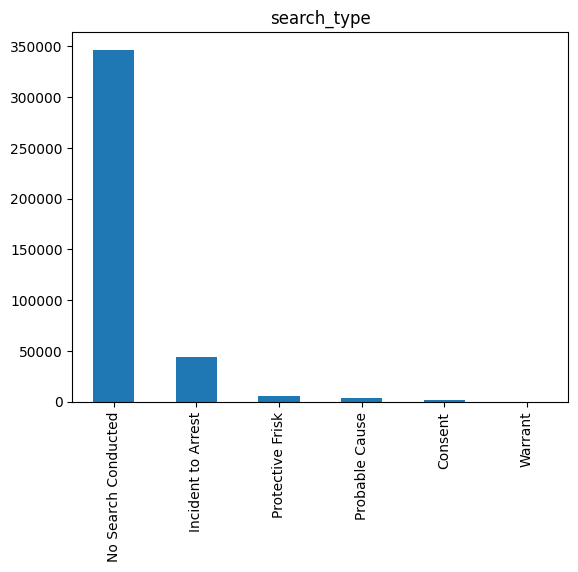

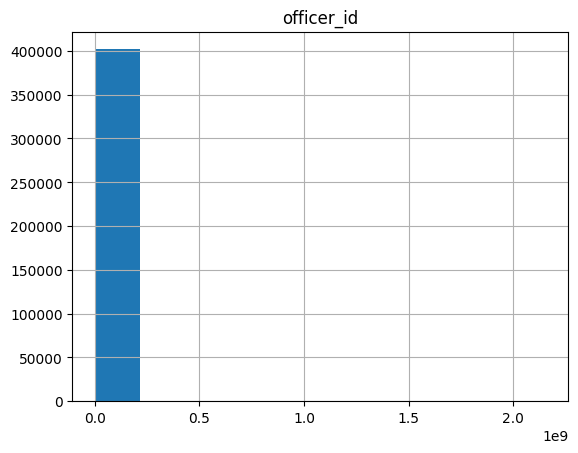

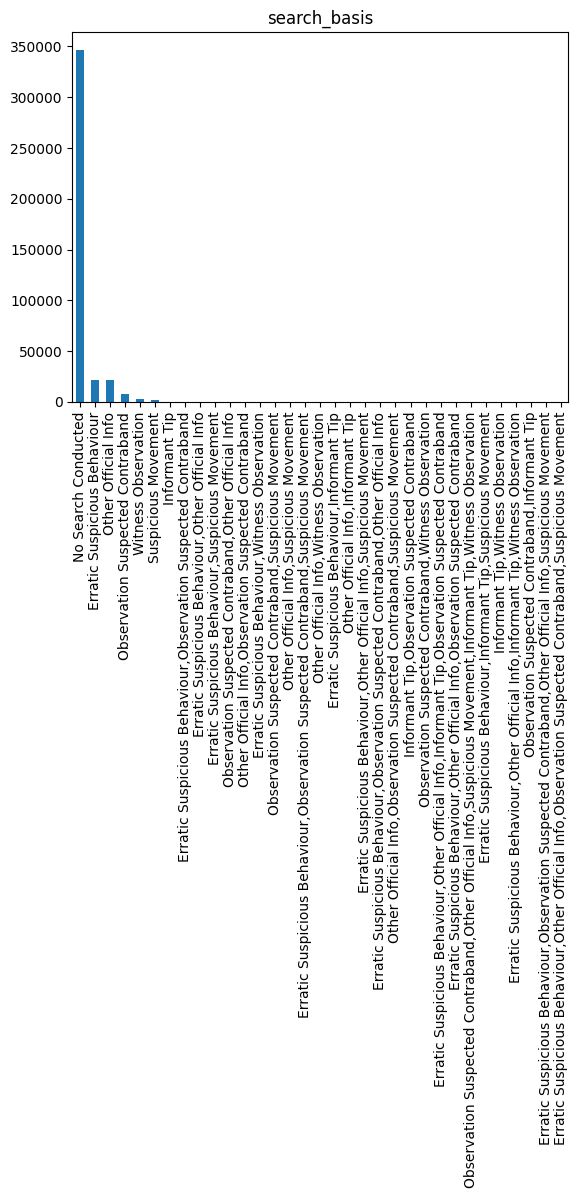

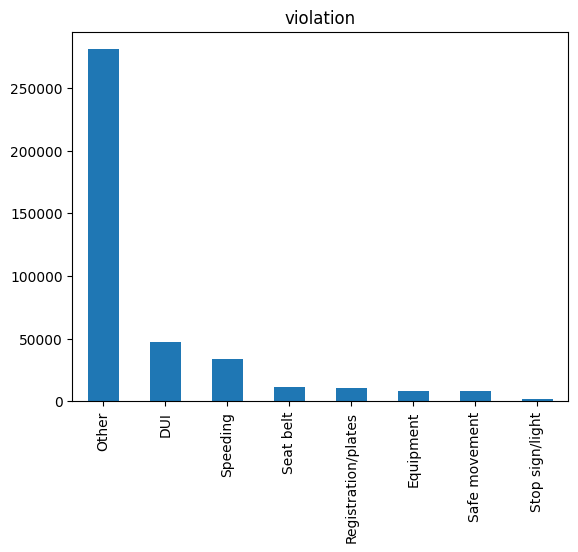

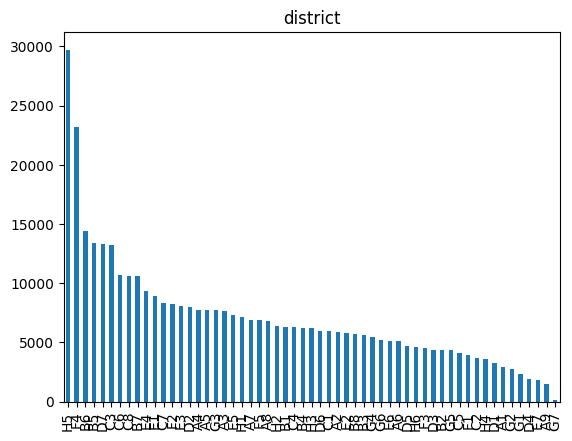

In [7]:
import matplotlib.pyplot as plt

# Separate visualization for boolean columns
boolean_columns = ['contraband_found']  # Add other boolean columns if any

for column in boolean_columns:
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()

# For the rest of the columns
remaining_columns = set(df.columns) - set(boolean_columns)
for column in remaining_columns:
    if df[column].dtype == 'object':
        df[column].value_counts().plot(kind='bar')
    else:
        df[column].hist()
    plt.title(column)
    plt.show()


In [ ]:
columns_to_drop = ['state','stop_date', 'drugs_related_stop', 'driver_race_raw','stop_outcome']

df.drop(columns=columns_to_drop, inplace=True)


print(df.head())

In [ ]:
# Encoding 'stop_outcome' to a binary format
df['stop_outcome_encoded'] = df['stop_outcome'].apply(lambda x: 1 if x == 'Arrest' else 0)

# Now, calculate the correlation
correlations = df.corr()['stop_outcome_encoded']
print(correlations)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your dataset and 'stop_outcome_encoded' is your encoded target column
X = df.drop(['stop_outcome', 'stop_outcome_encoded'], axis=1)  # dropping the original and encoded target columns
y = df['stop_outcome_encoded']

# You might need to preprocess X further, e.g., by encoding categorical variables, scaling, etc.


# Assuming your data is preprocessed, with X as your feature matrix and y as your 'stop_outcome' column
clf = RandomForestClassifier()
clf.fit(X, y)

importances = clf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importance)
